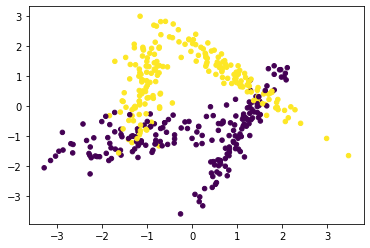

In [1]:
# Dataset 1
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
X, Y = make_classification(400, n_features=2, n_informative=2, n_redundant=0, random_state=0)
plt.scatter(X[:,0],X[:,1],20.2,Y)
plt.show()

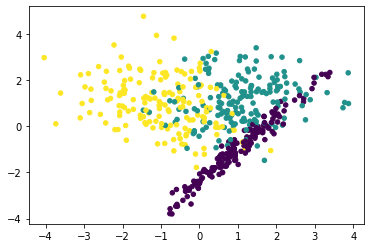

In [9]:
# Dataset 2
X2, Y2 = make_classification(500, n_features=2, n_informative=2, n_redundant=0,
                           random_state=0, n_classes=3, n_clusters_per_class=1)
plt.scatter(X2[:,0],X2[:,1],20.2,Y2)
plt.show()

In [5]:
import numpy as np
def plot_class(model, X, Y,n):
  xmin, xmax = np.amin(X[:,0]), np.amax(X[:,0])
  ymin, ymax = np.amin(X[:,1]), np.amax(X[:,1])
  xx, yy = np.meshgrid(np.linspace(xmin,xmax,n),np.linspace(ymin,ymax,n))
  z = np.c_[xx.ravel(), yy.ravel()]
  Y_predict = model.predict(z)
  Y_predict = Y_predict.reshape(xx.shape)
  cmap = plt.get_cmap('coolwarm')
  plt.contourf(xx,yy,Y_predict, cmap=cmap)
  cmap = plt.get_cmap('seismic')
  plt.scatter(X[:,0], X[:,1], 20.0, Y, cmap=cmap)
  plt.show()

In [6]:
def plot_proba(model, X, Y,n):
  xmin, xmax = np.amin(X[:,0]), np.amax(X[:,0])
  ymin, ymax = np.amin(X[:,1]), np.amax(X[:,1])
  xx, yy = np.meshgrid(np.linspace(xmin,xmax,n),np.linspace(ymin,ymax,n))
  z = np.c_[xx.ravel(), yy.ravel()]
  Y_predict = model.predict_proba(z)[:,1]
  Y_predict = Y_predict.reshape(xx.shape)
  cmap = plt.get_cmap('coolwarm')
  plt.contourf(xx,yy,Y_predict, cmap=cmap)
  cmap = plt.get_cmap('seismic')
  plt.scatter(X[:,0], X[:,1], 20.0, Y, cmap=cmap)
  plt.show()

# 1. Bernoulli Naive Bayes

In [2]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [13]:
bnb.fit(X,Y)

BernoulliNB()

In [4]:
bnb.score(X,Y)

0.84

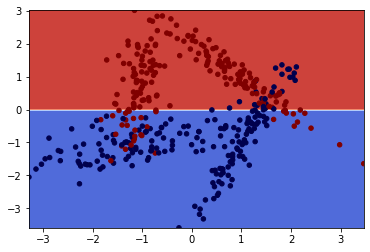

In [14]:
plot_class(bnb,X,Y,100)

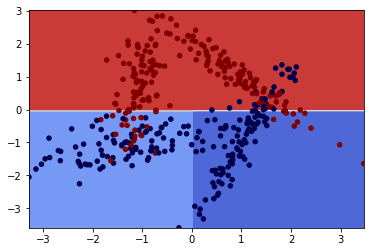

In [15]:
plot_proba(bnb,X,Y,100)

In [10]:
bnb.fit(X2,Y2)

BernoulliNB()

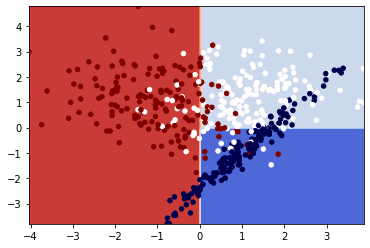

In [11]:
plot_class(bnb,X2,Y2,100)

# 2. Multinomial Naive Bayes

In [20]:
# Conjunto de datos
from sklearn.feature_extraction import DictVectorizer
data = [{'onions': 5,'spinach' : 10,'tomatoes':2},
        {'onions': 15,'spinach' : 1,'tomatoes':12},
        {'onions': 1,'spinach' : 8,'tomatoes':3},
        {'onions': 8,'spinach' : 5,'tomatoes':4}]

In [24]:
dv = DictVectorizer(sparse=False)

In [25]:
X = dv.fit_transform(data)

In [26]:
X

array([[ 5., 10.,  2.],
       [15.,  1., 12.],
       [ 1.,  8.,  3.],
       [ 8.,  5.,  4.]])

In [27]:
Y = np.array([1,1,0,0])

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [28]:
mnb.fit(X,Y)

MultinomialNB()

In [29]:
mnb.score(X,Y)

0.5

In [30]:
mnb.predict(X)

array([0, 1, 0, 1])

## Ejemplo: Clasificacion de texto

In [31]:
from sklearn.datasets import fetch_20newsgroups_vectorized
train_data = fetch_20newsgroups_vectorized(subset='train')
test_data = fetch_20newsgroups_vectorized(subset='test')

In [33]:
X_train = train_data['data']
Y_train = train_data['target']

In [35]:
X_test = test_data['data']
Y_test = test_data['target']

In [34]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=0.1)

In [36]:
mnb.score(X_test, Y_test)

0.8029739776951673

# 3. Gaussian Naive Bayes

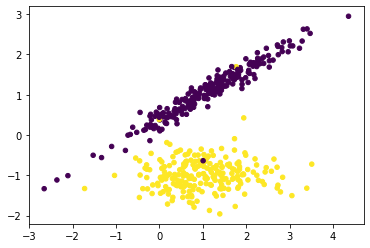

In [54]:
X, Y = make_classification(450, n_features=2, n_informative=2, n_redundant=0, 
                           random_state=1, n_clusters_per_class=1)
plt.scatter(X[:,0],X[:,1],20.2,Y)
plt.show()

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [55]:
gnb.fit(X,Y)

GaussianNB()

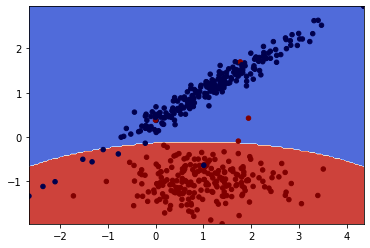

In [56]:
plot_class(gnb,X,Y,150)

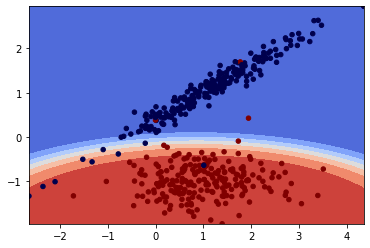

In [57]:
plot_proba(gnb,X,Y,150)

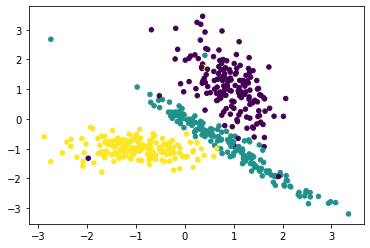

In [58]:
X, Y = make_classification(500, n_features=2, n_informative=2, n_redundant=0, 
                           random_state=1, n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:,0],X[:,1],20.2,Y)
plt.show()

In [59]:
gnb.fit(X,Y)

GaussianNB()

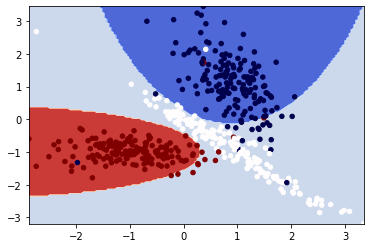

In [60]:
plot_class(gnb,X,Y,150)

# 4. Analisis discriminante

## a) Analisis discriminante cuadratico

In [61]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

In [62]:
qda.fit(X,Y)

QuadraticDiscriminantAnalysis()

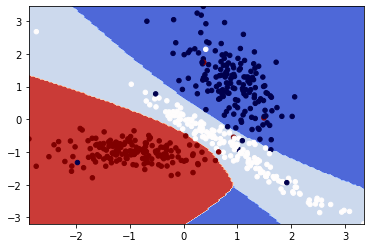

In [63]:
plot_class(qda,X,Y,150)

## b) Analisis discriminante lineal

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [65]:
lda.fit(X,Y)

LinearDiscriminantAnalysis()

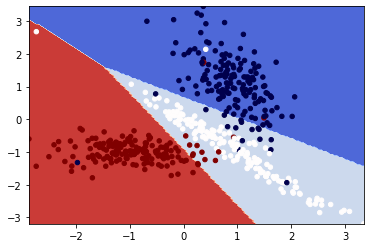

In [66]:
plot_class(lda,X,Y,150)